<a href="https://colab.research.google.com/github/DanielRaiicHu/telecom_x_2/blob/main/telecom_x_2.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# **Proyecto: Telecom X - Parte 2**

## **Preparación de los Datos**

### **Extracción del Archivo Tratado**

Se importan y tratan los datos generados en el desafío anterior

In [401]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

import warnings
# Ignoramos mensajes de advertencia para mantener la salida limpia
warnings.filterwarnings('ignore')

In [274]:
url = 'https://raw.githubusercontent.com/DanielRaiicHu/telecom_x_2/main/datos_tratados.csv'
datos = pd.read_csv(url)
datos.head()

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


In [275]:
datos.shape

(7043, 22)

In [276]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Cliente             7043 non-null   object 
 1   Evasion                7043 non-null   object 
 2   Genero                 7043 non-null   object 
 3   AdultoMayor            7043 non-null   object 
 4   TienePareja            7043 non-null   object 
 5   Dependientes           7043 non-null   object 
 6   MesesAntiguedad        7043 non-null   int64  
 7   ServicioTelefonico     7043 non-null   object 
 8   LineasMultiples        7043 non-null   object 
 9   ServicioInternet       7043 non-null   object 
 10  SeguridadEnLinea       7043 non-null   object 
 11  RespaldoEnLinea        7043 non-null   object 
 12  ProteccionDispositivo  7043 non-null   object 
 13  SoporteTecnico         7043 non-null   object 
 14  StreamingTV            7043 non-null   object 
 15  Stre

In [277]:
datos.describe()

,MesesAntiguedad,CuentasDiarias,CargoMensual,CargoTotal
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,2.158675,64.761692,2279.734304
std,24.559481,1.003088,30.090047,2266.794470
min,0.000000,0.610000,18.250000,0.000000
25%,9.000000,1.180000,35.500000,398.550000
50%,29.000000,2.340000,70.350000,1394.550000
75%,55.000000,2.990000,89.850000,3786.600000
max,72.000000,3.960000,118.750000,8684.800000


In [278]:
datos.describe(include = 'O')

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Masculino,No,No,No,Sí,No,Fibra óptica,No,No,No,No,No,No,Mensual,Sí,Cheque electrónico
freq,1,5174,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [279]:
# Revisión de datos únicos para cada columna
for col in datos.columns:
    if datos[col].dtype == 'object':
        print(f"Valores únicos en '{col}':")
        print(datos[col].unique())
        print("—" * 40)

Valores únicos en 'ID_Cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
————————————————————————————————————————
Valores únicos en 'Evasion':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'Genero':
['Femenino' 'Masculino']
————————————————————————————————————————
Valores únicos en 'AdultoMayor':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'TienePareja':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'Dependientes':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'ServicioTelefonico':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'LineasMultiples':
['No' 'Sí' 'Sin servicio telefónico']
————————————————————————————————————————
Valores únicos en 'ServicioInternet':
['DSL' 'Fibra óptica' 'No']
————————————————————————————————————————
Valores únicos en 'SeguridadEnLinea':
['No' 'Sí' 'Sin servicio de internet']
——————————————

### **Eliminación de columnas irrelevantes**

In [280]:
datos = datos.drop('ID_Cliente', axis=1)
datos.head()

,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,No,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,No,Masculino,No,No,No,9,Sí,Sí,DSL,No,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,No,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,No,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,No,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


Revisamos que no hayan valores nulos en nuestro dataframe

In [281]:
datos.isnull().sum()

,0
Evasion,0
Genero,0
AdultoMayor,0
TienePareja,0
Dependientes,0
MesesAntiguedad,0
ServicioTelefonico,0
LineasMultiples,0
ServicioInternet,0
SeguridadEnLinea,0


### **Tratamiento de los datos binarios**

In [283]:
# Trabajaremos sobre una copia para no tocar el DataFrame original
datos_codificados = datos.copy()

# Unificamos categorías 'sin servicio' a 'No' en todas las funciones que dependen de tener internet.
# Esto evita dummies mutuamente excluyentes del tipo '_Sí' y '_Sin servicio de internet'
cols_internet_dep = [
    'SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
    'SoporteTecnico','StreamingTV','StreamingPeliculas'
]

for c in cols_internet_dep:
    datos_codificados[c] = datos_codificados[c].replace({'Sin servicio de internet':'No'})

# También unificamos 'Sin servicio telefónico' a 'No' en LíneasMultiples
# (si no hay servicio telefónico, no puede haber líneas múltiples)
datos_codificados['LineasMultiples'] = (
    datos_codificados['LineasMultiples'].replace({'Sin servicio telefónico':'No'})
)

# Convertimos binarios 'Sí/No' a 1/0 (incluye la variable objetivo Evasion)
# Mantener estas columnas como numéricas simplifica el modelado y la medición de VIF
binarias = [
    'Evasion','AdultoMayor','TienePareja','Dependientes','ServicioTelefonico',
    'LineasMultiples','SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
    'SoporteTecnico','StreamingTV','StreamingPeliculas','FacturaElectronica'
]

# Dejamos todas las variables tratadas con 0s y 1s
datos_codificados[binarias] = datos_codificados[binarias].replace({'Sí':1, 'No':0})

# Codificamos Género en 0/1 (no hay orden natural, solo dos categorías)
datos_codificados['Genero'] = datos_codificados['Genero'].replace({'Femenino':0,'Masculino':1})


# Usamos drop_first=True para evitar colinealidad
# Las variables que siguen siendo tipo objecty las almacena en categoricas_restantes
categoricas_restantes =  datos_codificados.select_dtypes(include='object').columns.tolist()

datos_codificados = pd.get_dummies(data = datos_codificados, columns=categoricas_restantes, drop_first=True, dtype=int)



In [284]:
# Para mantener el orden original de mi dataframe
datos_codificados = datos_codificados.reindex(
    columns=sum(
        [
            ([c] if c not in categoricas_restantes else
             [col for col in datos_codificados.columns if col.startswith(f"{c}_")])
            for c in datos.columns
        ],[]
               )
            )

In [285]:
datos_codificados

,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet_Fibra óptica,ServicioInternet_No,...,StreamingPeliculas,TipoContrato_Mensual,TipoContrato_Un año,FacturaElectronica,MetodoPago_Cheque por correo,MetodoPago_Tarjeta de crédito (automático),MetodoPago_Transferencia bancaria (automática),CuentasDiarias,CargoMensual,CargoTotal
0,0,0,0,1,1,9,1,0,0,0,...,0,0,1,1,1,0,0,2.19,65.60,593.30
1,0,1,0,0,0,9,1,1,0,0,...,1,1,0,0,1,0,0,2.00,59.90,542.40
2,1,1,0,0,0,4,1,0,1,0,...,0,1,0,1,0,0,0,2.46,73.90,280.85
3,1,1,1,1,0,13,1,0,1,0,...,1,1,0,1,0,0,0,3.27,98.00,1237.85
4,1,0,1,1,0,3,1,0,1,0,...,0,1,0,1,1,0,0,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,0,0,0,...,0,0,1,0,1,0,0,1.84,55.15,742.90
7039,1,1,0,1,0,22,1,1,1,0,...,1,1,0,1,0,0,0,2.84,85.10,1873.70
7040,0,1,0,0,0,2,1,0,0,0,...,0,1,0,1,1,0,0,1.68,50.30,92.75
7041,0,1,0,1,1,67,1,0,0,0,...,1,0,0,0,1,0,0,2.26,67.85,4627.65


In [286]:
datos_codificados.shape

(7043, 25)

In [287]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Evasion                                         7043 non-null   int64  
 1   Genero                                          7043 non-null   int64  
 2   AdultoMayor                                     7043 non-null   int64  
 3   TienePareja                                     7043 non-null   int64  
 4   Dependientes                                    7043 non-null   int64  
 5   MesesAntiguedad                                 7043 non-null   int64  
 6   ServicioTelefonico                              7043 non-null   int64  
 7   LineasMultiples                                 7043 non-null   int64  
 8   ServicioInternet_Fibra óptica                   7043 non-null   int64  
 9   ServicioInternet_No                      

### **Correlación entre las variables con la variable objetivo**

In [288]:
correlacion = datos_codificados.corr()

In [289]:
correlacion['Evasion'].sort_values(ascending=False)

,Evasion
Evasion,1.000000
TipoContrato_Mensual,0.405103
ServicioInternet_Fibra óptica,0.308020
CuentasDiarias,0.193412
CargoMensual,0.193356
FacturaElectronica,0.191825
AdultoMayor,0.150889
StreamingTV,0.063228
StreamingPeliculas,0.061382
LineasMultiples,0.040102


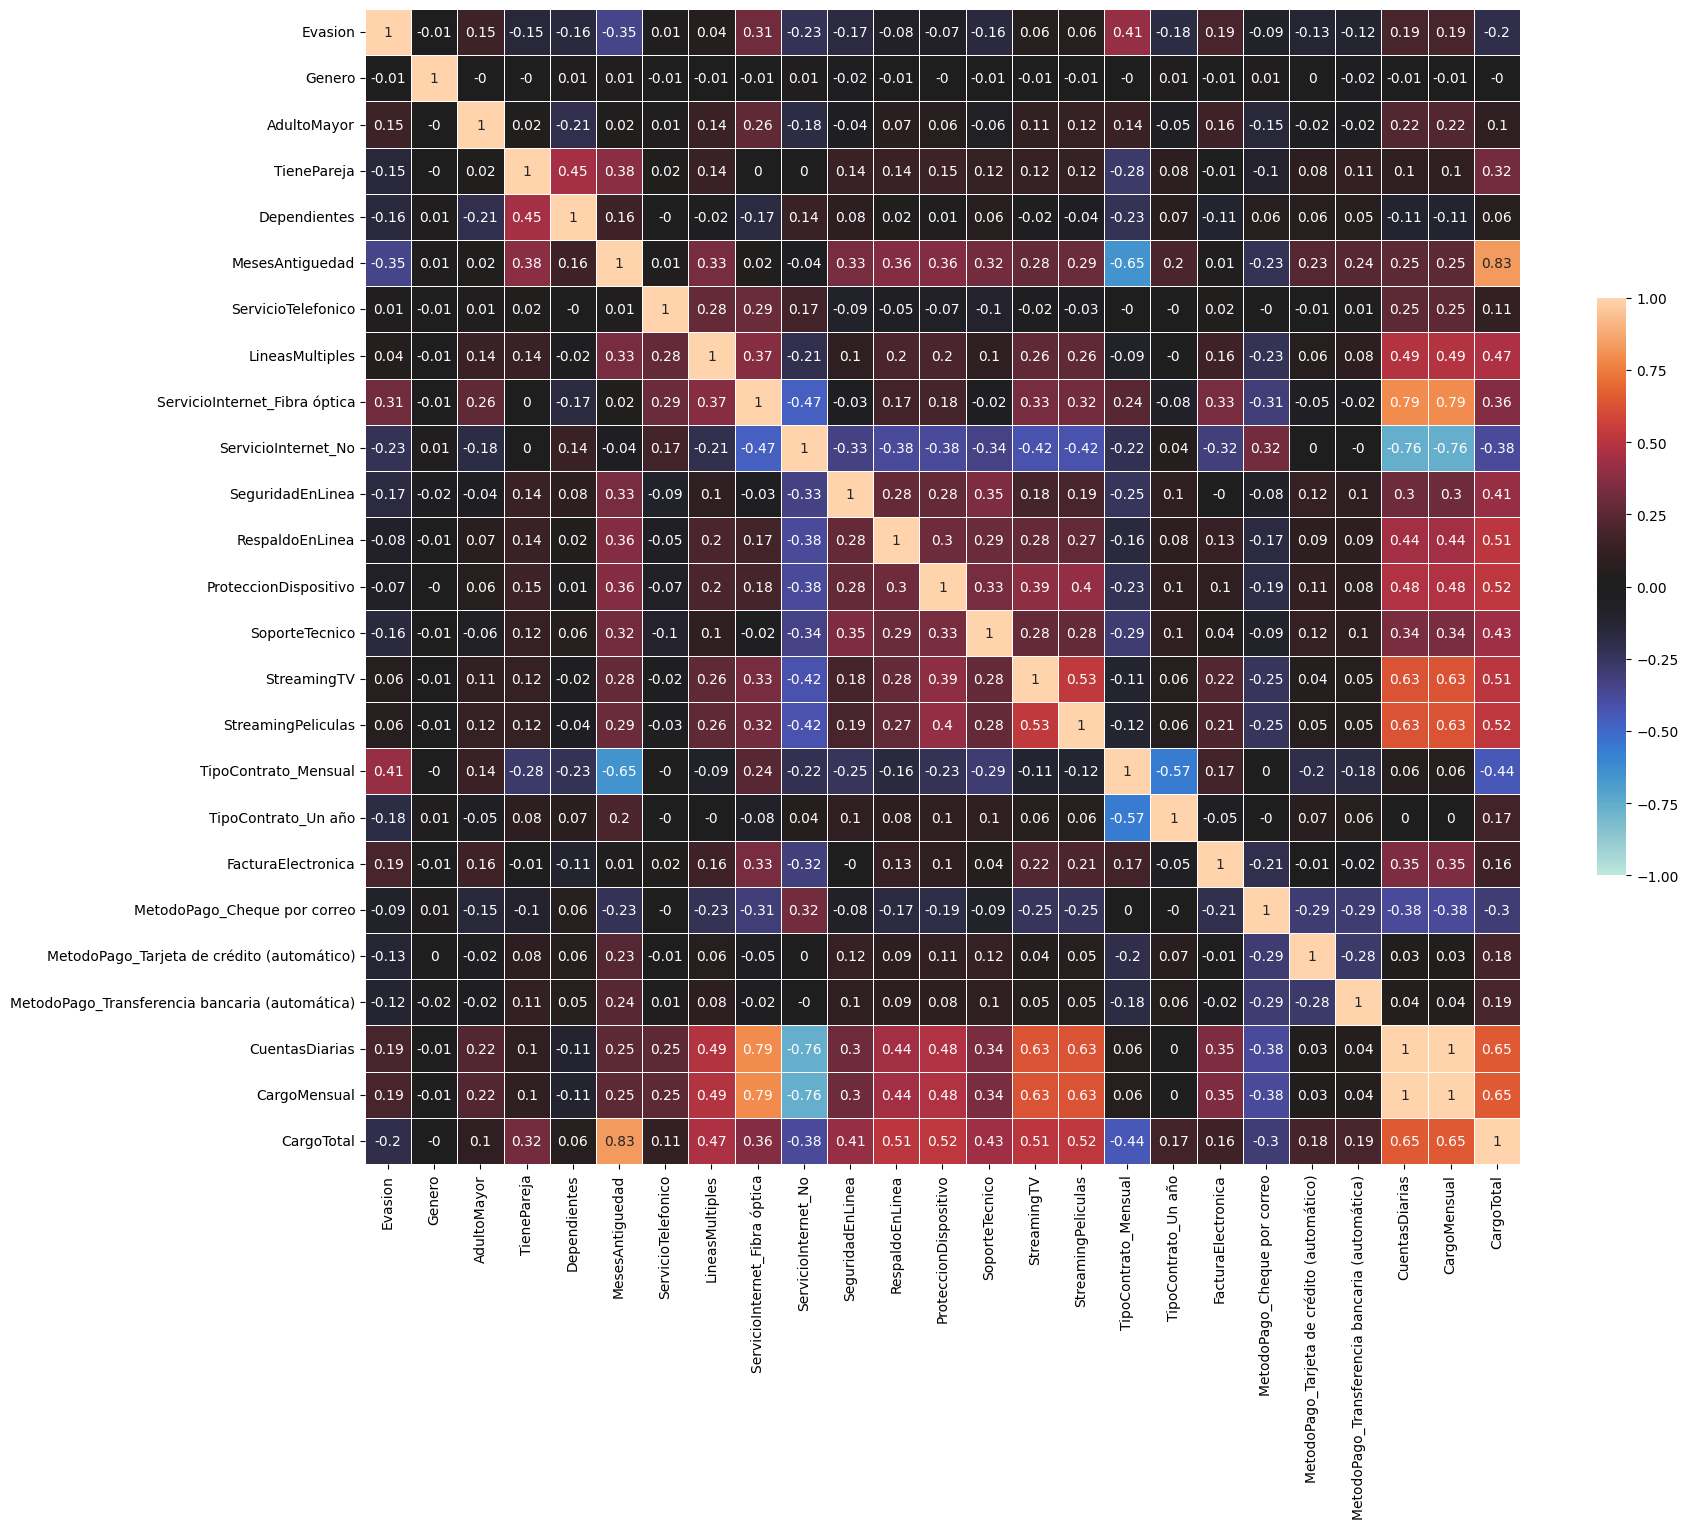

In [290]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(np.round(correlacion, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

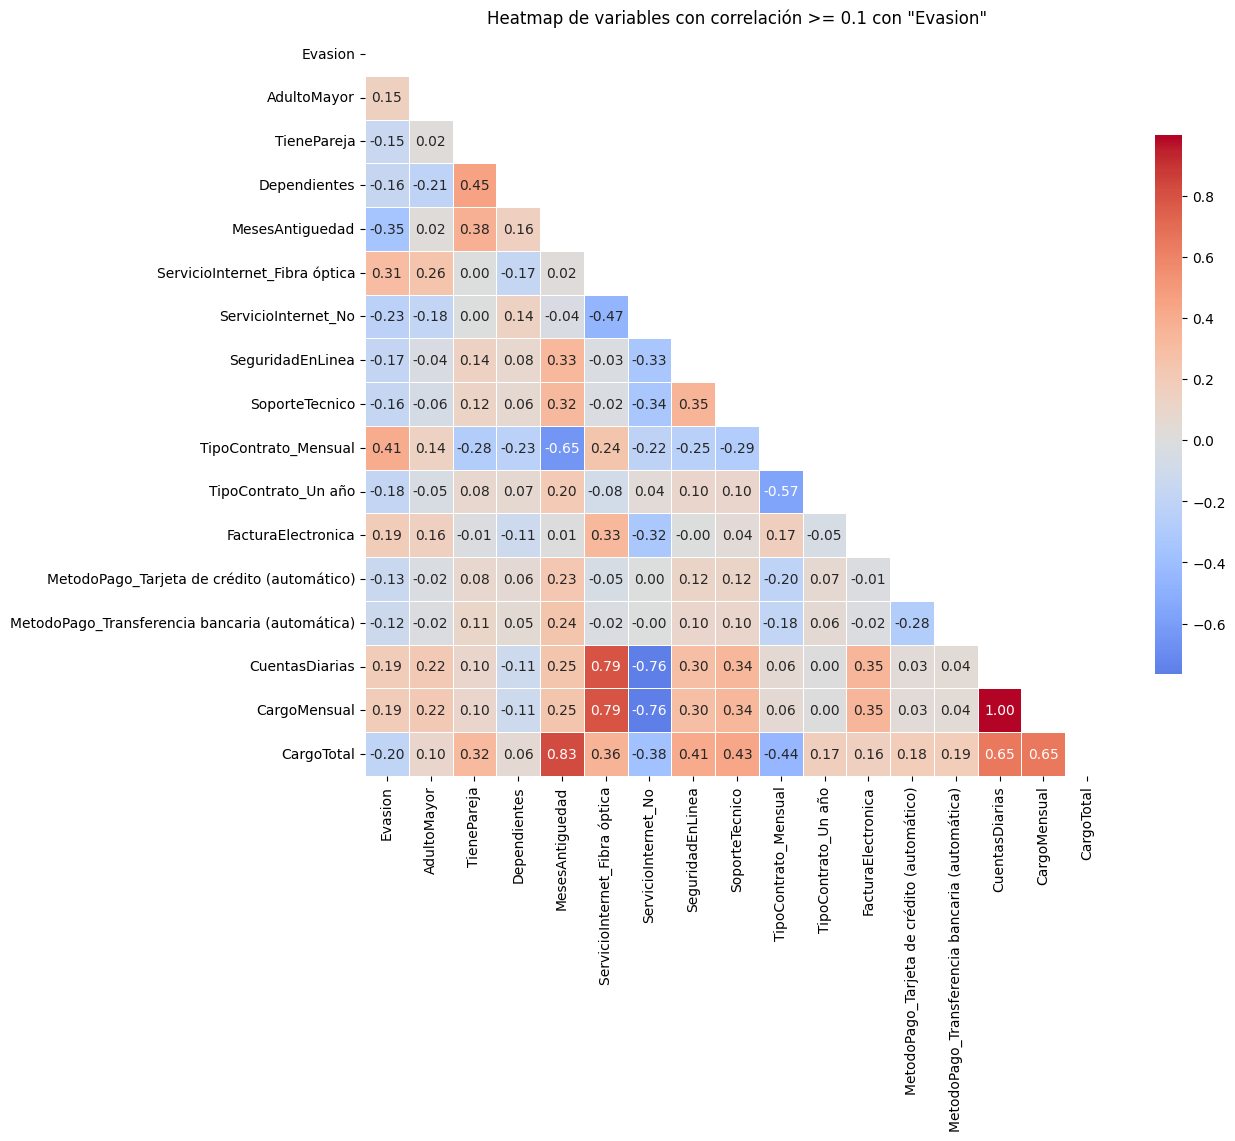

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Variable objetivo
variable_objetivo = 'Evasion'

# Definir el umbral mínimo de correlación absoluta para selección
limite = 0.1

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = correlacion.index[abs(correlacion[variable_objetivo]) >= limite].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if variable_objetivo not in variables_relevantes:
    variables_relevantes.append(variable_objetivo)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = correlacion.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limite} con "{variable_objetivo}"')
plt.show()

**Relacionando Variables con variable 'Evasion'**

In [294]:
print(correlacion[variable_objetivo].abs().sort_values(ascending=False))

Evasion                                           1.000000
TipoContrato_Mensual                              0.405103
MesesAntiguedad                                   0.352229
ServicioInternet_Fibra óptica                     0.308020
ServicioInternet_No                               0.227890
CargoTotal                                        0.198324
CuentasDiarias                                    0.193412
CargoMensual                                      0.193356
FacturaElectronica                                0.191825
TipoContrato_Un año                               0.177820
SeguridadEnLinea                                  0.171226
SoporteTecnico                                    0.164674
Dependientes                                      0.164221
AdultoMayor                                       0.150889
TienePareja                                       0.150448
MetodoPago_Tarjeta de crédito (automático)        0.134302
MetodoPago_Transferencia bancaria (automática)    0.1179

In [338]:
datos_codificados[['CargoMensual', 'CuentasDiarias']].corr()

,CargoMensual,CuentasDiarias
CargoMensual,1.000000,0.999996
CuentasDiarias,0.999996,1.000000


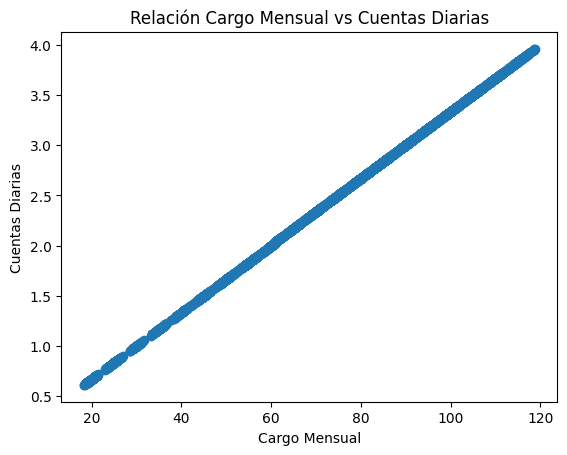

In [346]:
plt.scatter(datos_codificados['CargoMensual'],datos_codificados['CuentasDiarias']) #ejes x,y
plt.title('Relación Cargo Mensual vs Cuentas Diarias')
plt.xlabel('Cargo Mensual')
plt.ylabel('Cuentas Diarias')
plt.show()

In [340]:
datos_codificados[['MesesAntiguedad', 'CargoTotal']].corr()

,MesesAntiguedad,CargoTotal
MesesAntiguedad,1.000000,0.826178
CargoTotal,0.826178,1.000000


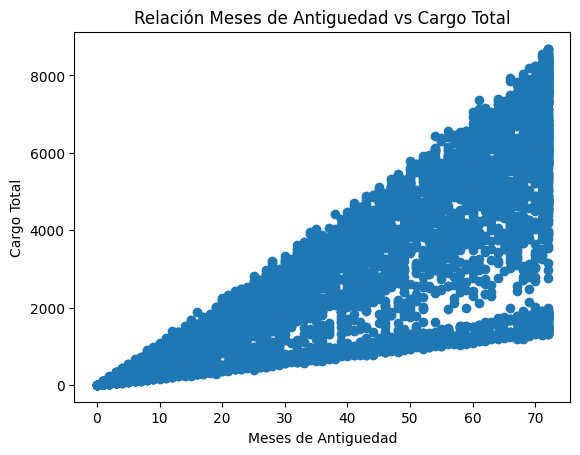

In [345]:
plt.scatter(datos_codificados['MesesAntiguedad'],datos_codificados['CargoTotal']) #ejes x,y
plt.title('Relación Meses de Antiguedad vs Cargo Total')
plt.xlabel('Meses de Antiguedad')
plt.ylabel('Cargo Total')
plt.show()

In [295]:
# Se omite la variable respuesta
predictores = datos_codificados.drop(columns='Evasion', errors='ignore')

# Matriz de correlación absoluta entre predictores
corr_pred = predictores.corr(numeric_only=True).abs()

# Quedarnos con el triángulo superior (sin diagonal)
upper = corr_pred.where(np.triu(np.ones_like(corr_pred, dtype=bool), k=1))

# Pares por encima del umbral
umbral = 0.85
pareja_correlacion = (upper
    .stack()
    .reset_index()
    .rename(columns={'level_0':'col1','level_1':'col2', 0:'corr'})
    .query('corr >= @umbral')
    .sort_values('corr', ascending=False)
)
pareja_correlacion

,col1,col2,corr
273,CuentasDiarias,CargoMensual,0.999996


### **Verificación de la proporción**

Visualización gráfica de clientes que evaden (Sí) vs clientes que permanecen (No)

In [296]:
cantidad_evasion = datos_codificados.Evasion.value_counts()
proporcion_evasion = datos_codificados['Evasion'].value_counts(normalize=True).sort_index()

print(f'De un total de {datos_codificados["Evasion"].size} clientes.')
print(f'Los clientes que evaden son: {cantidad_evasion[1].sum()}, equivalentes al {proporcion_evasion[1]:.2%}')
print(f'Los clientes que permanecen son: {cantidad_evasion[0].sum()}, equivalentes al {proporcion_evasion[0]:.2%}')

De un total de 7043 clientes.
Los clientes que evaden son: 1869, equivalentes al 26.54%
Los clientes que permanecen son: 5174, equivalentes al 73.46%


In [297]:
px.histogram(datos, x='Evasion', text_auto=True, color='Evasion') #plotly.express

---
>* **Se observa una diferencia significativa entre la cantidad de clientes que permanecen y aquellos que abandonan el servicio. Aunque la mayoría de los clientes se mantiene, el porcentaje de evasión alcanza un 26.54%, lo cual representa una proporción bastante considerable.**

---

### **Separación de Variables Explicativas y Respuesta**

In [298]:
from sklearn.model_selection import train_test_split

# Variables Explicativas
X = datos_codificados.drop('Evasion', axis=1)

# Variable Respuesta
y = datos_codificados['Evasion']

# División inicial entre conjunto general y conjunto de prueba (30% para prueba)
X, X_test,y,y_test = train_test_split(X,y,test_size= 0.2, stratify = y, random_state = 5)

# División secundaria: entrenamiento vs validación
X_train, X_val,y_train,y_val = train_test_split(X,y, stratify = y, random_state = 5)

In [299]:
X.head()

,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet_Fibra óptica,ServicioInternet_No,SeguridadEnLinea,...,StreamingPeliculas,TipoContrato_Mensual,TipoContrato_Un año,FacturaElectronica,MetodoPago_Cheque por correo,MetodoPago_Tarjeta de crédito (automático),MetodoPago_Transferencia bancaria (automática),CuentasDiarias,CargoMensual,CargoTotal
6002,0,0,1,0,57,1,1,1,0,1,...,1,1,0,1,0,0,0,3.32,99.65,5497.05
2870,1,0,1,0,55,1,1,1,0,0,...,1,0,1,1,0,0,0,3.47,104.15,5743.05
1340,0,1,1,0,48,1,0,1,0,0,...,0,1,0,1,0,0,1,2.36,70.65,3545.05
1510,1,0,0,0,8,1,0,0,0,0,...,0,1,0,1,1,0,0,1.50,45.15,438.40
4437,1,0,1,0,71,1,1,1,0,0,...,1,0,0,1,0,1,0,3.47,104.15,7365.30


In [300]:
y.head()

,Evasion
6002,0
2870,1
1340,0
1510,1
4437,0


### **Entrenando Modelos**

In [335]:
# Modelo Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
modelo_arbol = DecisionTreeClassifier(max_depth=10) # Límite de profundidad = 10
modelo_arbol.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del Modelo de Árbol con el conjunto de entrenamiento es de: {modelo_arbol.score(X_train,y_train)}')
print(f'La exactitud del Modelo de Árbol con el conjunto de validación es de: {modelo_arbol.score(X_val,y_val)}')

La exactitud del Modelo de Árbol con el conjunto de entrenamiento es de: 0.8893697592642683
La exactitud del Modelo de Árbol con el conjunto de validación es de: 0.7656123276561233


In [347]:
# Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
modelo_forest = RandomForestClassifier(max_depth=10) # Límite de profundidad = 10
modelo_forest.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del Modelo Forest con el conjunto de entrenamiento es de: {modelo_forest.score(X_train,y_train)}')
print(f'La exactitud del Modelo Forest con el conjunto de validación es de: {modelo_forest.score(X_val,y_val)}')

La exactitud del Modelo Forest con el conjunto de entrenamiento es de: 0.8974844468487964
La exactitud del Modelo Forest con el conjunto de validación es de: 0.8045417680454177


**Entrenamiento y evaluación de modelos**

* Se **entrenaron dos modelos de clasificación** utilizando `X_train, y_train` y se evaluaron en `X_val, y_val`. La métrica utilizada fue accuracy (`.score()` de scikit-learn).

* La partición utilizada es la previamente definida (70/30, estratificada y con random_state=5).

**Modelos y configuración**

* **Árbol de Decisión** (`DecisionTreeClassifier`) con `max_depth=10`.

* **Random Forest** (`RandomForestClassifier`) con `max_depth=10`.

**Resultados (accuracy)**

* **Árbol de Decisión**

>* Entrenamiento: 0.889
>
>* Validación: 0.766

* **Random Forest**

>* Entrenamiento: 0.897
>
>* Validación: 0.805

**Observaciones**

* En el **Árbol de Decisión** se observa una **brecha train–val ≈ 0.123**, lo que indica **sobreajuste moderado**.

* El **Random Forest** presenta una **brecha menor (≈ 0.092)** y **mejor accuracy en validación (0.805 vs 0.766)**, por lo que generaliza mejor que el árbol simple.

* Ambos modelos superan el baseline de predecir siempre la **clase mayoritaria (~0.735)** y, de los dos, **Random Forest es el que más mejora el resultado**: al ordenar a los clientes por su puntaje, los primeros casos contienen una proporción mayor de evasores que la media.

**Conclusión**

* El Random Forest es el mejor punto de partida: ofrece **mejor desempeño en validación y menor sobreajuste**. Aun así, existe margen de mejora con ajuste de hiperparámetros y con métricas más alineadas al objetivo de negocio (detectar correctamente a quienes evaden).




### **Matriz de Confusión**

In [348]:
from sklearn.metrics import confusion_matrix

In [349]:
# Matriz de Confusión tipo Array - Modelo Árbol
y_previsto_arbol = modelo_arbol.predict(X_val)
matriz_confusion_arbol = confusion_matrix(y_val,y_previsto_arbol)
print(matriz_confusion_arbol)

[[752 154]
 [135 192]]


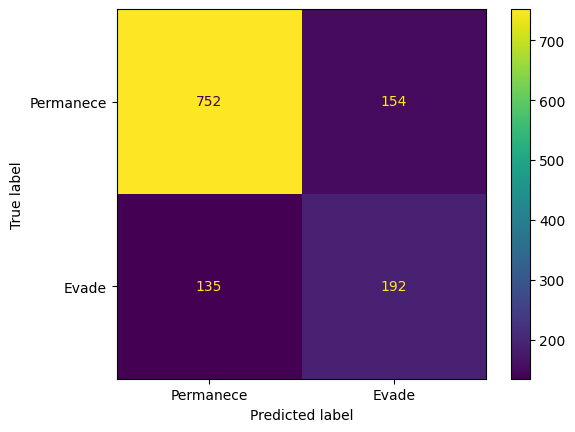

In [350]:
# Matriz de Confusión - Modelo Árbol
visualizacion_arbol = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_arbol,
    display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
)

visualizacion_arbol.plot();

In [351]:
# Matriz de Confusión tipo Array - Modelo Random Forest
y_previsto_forest = modelo_forest.predict(X_val)
matriz_confusion_forest = confusion_matrix(y_val,y_previsto_forest)
print(matriz_confusion_forest)

[[822  84]
 [157 170]]


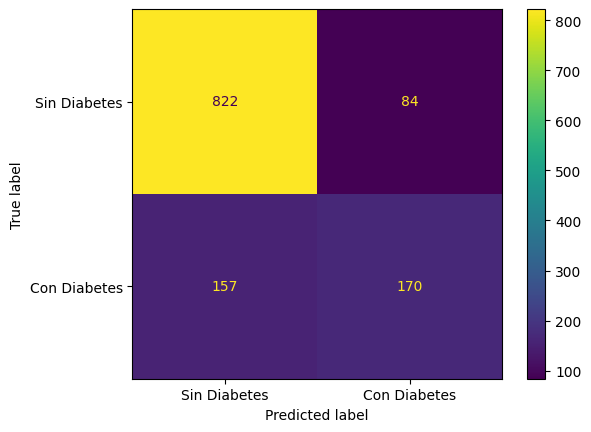

In [353]:
# Matriz de Confusión - Modelo Random Forest
visualizacion_forest = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_forest,
    display_labels=['Sin Diabetes', 'Con Diabetes']  # Etiquetas para las clases 0 y 1
)

visualizacion_forest.plot();

**Matriz de confusión y métricas de evaluación**

* Con los modelos ya entrenados sobre `X_train, y_train`, obtuve **predicciones en `X_val`** y calculé la **matriz de confusión** y métricas para la clase positiva **“Evade” (1)**.
* El formato de la matriz impresa es `[[TN FP], [FN TP]]`.

**Árbol de Decisión (max_depth = 10)**

> * Matriz: `[[752 154], [135 192]]`  
> * Accuracy: **0.766**  
> * Precisión (Evade): **0.555**
> * Recall / Sensibilidad (Evade): **0.587**  
> * F1 (Evade): **≈ 0.57**

**Random Forest (max_depth = 10)**

> * Matriz: `[[822 84], [157 170]]`  
> * Accuracy: **0.805**  
> * Precisión (Evade): **0.669**
> * Recall / Sensibilidad (Evade): **0.520**
> * F1 (Evade): **≈ 0.59**

**Lecturas rápidas**

* **Random Forest** logra **mayor accuracy (0.805)** y **mejor precisión** al marcar “Evade” (menos falsos positivos).
* **Árbol de Decisión** alcanza **mayor recall** para “Evade” (detecta más evasores), pero con **más falsos positivos** (menor precisión).
* Ambos superan el baseline de clasificar siempre la clase mayoritaria (**~0.735**).

**Conclusión**

* Si se desea **minimizar falsas alarmas** y mantener **precisión alta**, **Random Forest** es la mejor opción inicial.
* Si se prioriza **capturar más evasores** (maximizar **recall**), el **Árbol de Decisión** ofrece más detecciones, aunque con más alertas falsas.


## **Métricas de Evaluación**

### **Precisión, recall, accuracy y F1-Score**

In [356]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [357]:
# Métricas Modelo Árbol
print(f'La precisión del modelo de árbol es: {precision_score(y_val,y_previsto_arbol)}')
print(f'La sensibilidad (recall) del modelo de árbol es: {recall_score(y_val,y_previsto_arbol)}')
print(f'La exactitud (accuracy) del modelo de árbol es: {accuracy_score(y_val,y_previsto_arbol)}')
print(f'El F1-Score del modelo de árbol es: {f1_score(y_val,y_previsto_arbol)}')

La precisión del modelo de árbol es: 0.5549132947976878
La sensibilidad (recall) del modelo de árbol es: 0.5871559633027523
La exactitud (accuracy) del modelo de árbol es: 0.7656123276561233
El F1-Score del modelo de árbol es: 0.5705794947994056


In [358]:
# Métricas Modelo Forest
print(f'La precisión del modelo forest es: {precision_score(y_val,y_previsto_forest)}')
print(f'La sensibilidad (recall) del modelo forest es: {recall_score(y_val,y_previsto_forest)}')
print(f'La exactitud (accuracy) del modelo forest es: {accuracy_score(y_val,y_previsto_forest)}')
print(f'El F1-Score del modelo forest es: {f1_score(y_val,y_previsto_forest)}')

La precisión del modelo forest es: 0.6692913385826772
La sensibilidad (recall) del modelo forest es: 0.5198776758409785
La exactitud (accuracy) del modelo forest es: 0.8045417680454177
El F1-Score del modelo forest es: 0.5851979345955249


### **Curva ROC y Métrica AUC**

In [359]:
# Importamos la herramienta para graficar la curva ROC
from sklearn.metrics import RocCurveDisplay
# Importamos la función para calcular el área bajo la curva ROC (AUC)
from sklearn.metrics import roc_auc_score

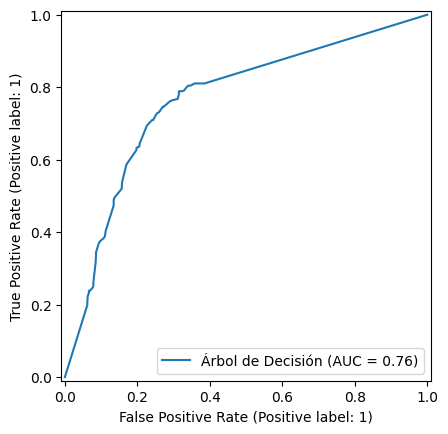

In [374]:
# Puntajes: probabilidad de la clase positiva (Evade = 1)
y_score_arbol  = modelo_arbol.predict_proba(X_val)[:, 1]

# Curva ROC Modelo Árbol
RocCurveDisplay.from_predictions(y_val, y_score_arbol,  name='Árbol de Decisión');

In [376]:
# El Área Bajo la Curva (AUC) - Modelo Árbol
print(f'El área bajo la curva ROC del modelo de Árbol de Decisión es de:  {roc_auc_score(y_val, y_score_arbol):.4f}')

El área bajo la curva ROC del modelo de Árbol de Decisión es de:  0.7648


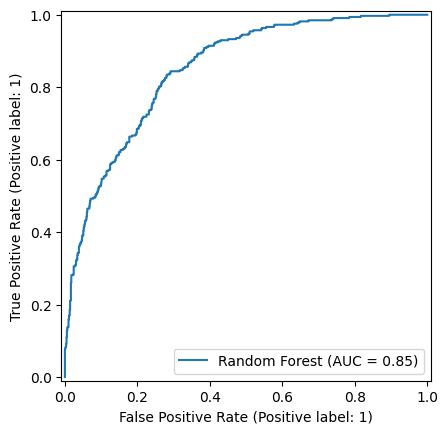

In [380]:
# Puntajes: probabilidad de la clase positiva (Evade = 1)
y_score_forest = modelo_forest.predict_proba(X_val)[:, 1]

# Curva ROC Modelo Forest
RocCurveDisplay.from_predictions(y_val, y_score_forest, name='Random Forest');

In [379]:
# El Área Bajo la Curva (AUC) - Modelo Forest
print(f'El área bajo la curva ROC del modelo Random Forest es de: {roc_auc_score(y_val, y_score_forest):.4f}')

El área bajo la curva ROC del modelo Random Forest es de: 0.8490


**Curva ROC y Métrica AUC**

* Se obtuvieron **probabilidades de la clase positiva (Evade=1)** con `predict_proba[:, 1]` para cada modelo.
* Con esos puntajes se graficó la **curva ROC** y se calculó el **AUC** en el set de validación (`y_val`).

**Árbol de Decisión (max_depth = 10)**

> * AUC (ROC): **0.765**  
> * Interpretación: el modelo separa mejor que el azar (0.5) y presenta capacidad moderada para ordenar clientes por riesgo de evasión.

**Random Forest (max_depth = 10)**

> * AUC (ROC): **0.849**  
> * Interpretación: el modelo muestra **mayor poder discriminante**, ordenando con más consistencia a quienes evaden.

**Lecturas rápidas**

* Ambos modelos obtienen **AUC > 0.5**; **Random Forest** es superior (**0.849 vs 0.765**).
* El resultado es coherente con las métricas previas: Random Forest generaliza mejor y clasifica con mayor precisión.

**Conclusión**

* Si se requiere **priorizar clientes por riesgo** (usar un score), **Random Forest** es el punto de partida recomendado por su mayor AUC.
* El **umbral de decisión** debería ajustarse según los costos del negocio (compromiso entre *recall* y *precisión*).

### **Curva de Precisión x Recall y Métrica AP (Average Precision)**

In [388]:
# Importamos la clase que permite graficar la curva Precisión vs Recall
from sklearn.metrics import PrecisionRecallDisplay

# Importamos la métrica de promedio de precisión (average precision)
from sklearn.metrics import average_precision_score

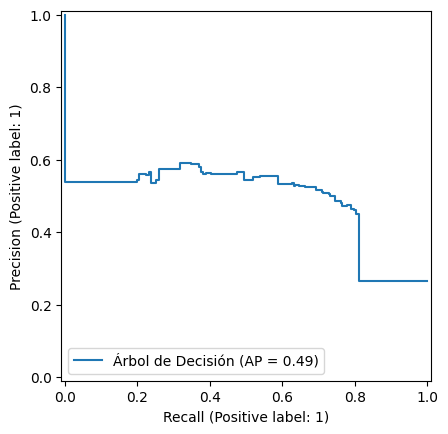

In [399]:
# Curva de Precisión x Recall - Modelo Árbol de Decisión
PrecisionRecallDisplay.from_predictions(y_val, y_score_arbol, name='Árbol de Decisión');

In [395]:
# Métrica AP - Modelo Árbol de Decisión
print(f'El score promedio de precisión vs recall para el modelo de árbol es de: {average_precision_score(y_val, y_score_arbol)}')

El score promedio de precisión vs recall para el modelo de árbol es de: 0.4894825536680894


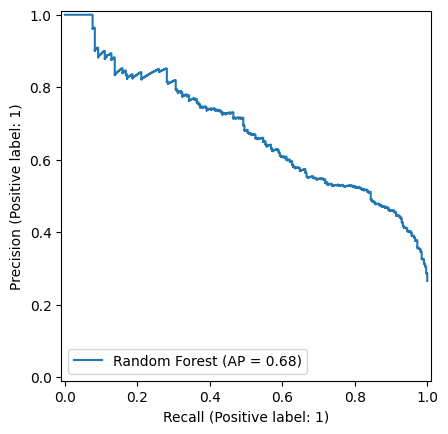

In [398]:
# Curva de Precisión x Recall - Modelo Random Forest
PrecisionRecallDisplay.from_predictions(y_val, y_score_forest, name='Random Forest');

In [397]:
# Métrica AP - Modelo Random Forest
print(f'El score promedio de precisión vs recall para el modelo forest es de: {average_precision_score(y_val, y_score_forest)}')

El score promedio de precisión vs recall para el modelo forest es de: 0.6811322495187667


**Curvas Precisión–Recall y Average Precision (AP)**

* Se calcularon las curvas **Precisión–Recall** y la métrica **AP** usando las probabilidades de pertenecer a la clase positiva **“Evade (1)”** sobre `X_val`.
* El **AP** es el área bajo la curva Precisión–Recall; en problemas desbalanceados es más informativo que la accuracy.  
  El baseline del AP es la prevalencia de la clase positiva en validación (≈ 0.265).

**Resultados (val)**
* **Árbol de Decisión**: AP ≈ **0.44**  
* **Random Forest**: AP ≈ **0.48**

**Lecturas**
* Ambos modelos superan el baseline de prevalencia (**~0.265**), por lo que aportan valor para encontrar evasores.
* **Random Forest** logra **mayor AP**, manteniendo mejor compromiso precisión–recall a lo largo de distintos umbrales.
* El Árbol de Decisión ofrece más recall en el umbral por defecto, pero con menor precisión; al mover umbrales, el bosque mantiene una zona más amplia de precisión alta.


### **Informe de Métricas**

In [402]:
# Informe de Métricas
from sklearn.metrics import classification_report

In [408]:
# Informe de Métricas para Modelo de Árbol
print('\n*******************************************************\n')
print(f'Informe de Métricas para Modelo de Árbol:\n\n{classification_report(y_val, y_previsto_arbol)}')



# Informe de Métricas para Modelo Forest
print('\n*******************************************************\n')
print(f'Informe de Métricas para Modelo Forest:\n\n{classification_report(y_val, y_previsto_forest)}')


*******************************************************

Informe de Métricas para Modelo de Árbol:

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       906
           1       0.55      0.59      0.57       327

    accuracy                           0.77      1233
   macro avg       0.70      0.71      0.70      1233
weighted avg       0.77      0.77      0.77      1233


*******************************************************

Informe de Métricas para Modelo Forest:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       906
           1       0.67      0.52      0.59       327

    accuracy                           0.80      1233
   macro avg       0.75      0.71      0.73      1233
weighted avg       0.79      0.80      0.80      1233



**Informe de métricas (classification_report)**

* Se generó el **informe de métricas** en el conjunto de validación (`X_val`, `y_val`) para ambos modelos ya entrenados.
* Las métricas mostradas por clase son: **precision**, **recall** y **f1-score**; además se reporta el **accuracy** global.

**Árbol de Decisión (max_depth = 10)**

> * Clase 0 (Permanece): **precision 0.85**, **recall 0.83**, **f1 0.84**, support **906**  
> * Clase 1 (Evade): **precision 0.55**, **recall 0.59**, **f1 0.57**, support **327**  
> * **Accuracy global:** **0.77**  
> * **Macro avg** — precision **0.70**, recall **0.71**, f1 **0.70**, support **1233**  
> * **Weighted avg** — precision **0.77**, recall **0.77**, f1 **0.77**, support **1233**

**Random Forest (max_depth = 10)**

> * Clase 0 (Permanece): **precision 0.84**, **recall 0.91**, **f1 0.87**, support **906**  
> * Clase 1 (Evade): **precision 0.67**, **recall 0.52**, **f1 0.59**, support **327**  
> * **Accuracy global:** **0.80**  
> * **Macro avg** — precision **0.75**, recall **0.71**, f1 **0.73**, support **1233**  
> * **Weighted avg** — precision **0.79**, recall **0.80**, f1 **0.80**, support **1233**

**Lecturas rápidas**

* El **Random Forest** presenta **mayor exactitud global (0.80)** y **mejor precisión** al predecir *Evade*.  
* El **Árbol de Decisión** muestra **mayor recall en *Evade*** (detecta más evasores) a costa de menor precisión.  
* La elección entre modelos depende del objetivo: **minimizar falsas alarmas** (priorizar precisión) favorece **Random Forest**; **capturar más evasores** (priorizar recall) favorece el **Árbol**.

**Conclusión**

* Se observó que **Random Forest** es un mejor punto de partida por **mayor desempeño global y menor sesgo hacia la clase mayoritaria**. No obstante, si el negocio valora más no dejar escapar evasores, puede **ajustarse el umbral** para aumentar el recall en *Evade*.


## **Multicolinealidad**

In [319]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Función para calcular la tabla de VIF de un subconjunto de columnas
def tabla_vif(Xsub):
    X_ = Xsub.astype(float).copy()
    cols = X_.columns.tolist()
    out = pd.DataFrame({
        'variables': cols,
        'vif': [vif(X_.values, i) for i in range(len(cols))]
    }).sort_values('vif', ascending=False).reset_index(drop=True)
    return out

In [331]:
# --- Modelo 1: TODAS las explicativas tal como están en X_train
explicativas_1 = X_train.columns.tolist()

# --- Modelo 2: quitamos redundancias fuertes + resolvemos par teléfono/múltiples líneas
#     * CargoTotal es función de CargoMensual y MesesAntiguedad
#     * CuentasDiarias duplica a CargoMensual
#     * Si existen ambas: nos quedamos con LineasMultiples y quitamos ServicioTelefonico
redundantes = ['CargoTotal', 'CuentasDiarias']

# Si están ambas columnas, preferimos 'LineasMultiples' y removemos 'ServicioTelefonico'
if ('LineasMultiples' in X_train.columns) and ('ServicioTelefonico' in X_train.columns):
    redundantes.append('ServicioTelefonico')

# Variables explicativas sin redundancias
explicativas_2 = [c for c in X_train.columns if c not in redundantes]


# --- Modelo 3: relevantes por correlación con la respuesta (>= 0.10 en train)
tmp_corr = X_train.copy()
tmp_corr['Evasion'] = y_train  # añadimos y para medir la correlación con la respuesta

relevantes = (
    tmp_corr.corr(numeric_only=True)['Evasion']
           .abs()
           .sort_values(ascending=False)
)
umbral = 0.10
cols_corr = relevantes[relevantes >= umbral].index.tolist()

# removemos la propia 'Evasion'
cols_corr = [c for c in cols_corr if c != 'Evasion']

# quitamos las redundancias fuertes definidas en el bloque 2
cols_corr = [c for c in cols_corr if c not in ['CargoTotal', 'CuentasDiarias']]

# si aparecen ambas, nos quedamos con 'LineasMultiples' y quitamos 'ServicioTelefonico'
if ('ServicioTelefonico' in cols_corr) and ('LineasMultiples' in cols_corr):
    cols_corr.remove('ServicioTelefonico')

# para bajar VIF en modelos lineales:
# si está 'CargoMensual', quitamos 'MesesAntiguedad' (suele ser la fuente del VIF alto)
if ('CargoMensual' in cols_corr) and ('MesesAntiguedad' in cols_corr):
    cols_corr.remove('MesesAntiguedad')

explicativas_3 = cols_corr

In [332]:
# VIF Modelo 1 (todas)
vif_1 = tabla_vif(X_train[explicativas_1])
print("VIF - Modelo 1 (todas las variables):")
display(vif_1)

# VIF Modelo 2 (sin redundancias)
vif_2 = tabla_vif(X_train[explicativas_2])
print("VIF - Modelo 2 (sin CargoTotal ni CuentasDiarias):")
display(vif_2)

# VIF Modelo 3 (solo relevantes por correlación + sin redundancias)
vif_3 = tabla_vif(X_train[explicativas_3])
print(f"VIF - Modelo 3 (|corr| >= {umbral} + limpieza de redundancias):")
display(vif_3)

print(f"#vars modelo1: {len(explicativas_1)} | modelo2: {len(explicativas_2)} | modelo3: {len(explicativas_3)}")

VIF - Modelo 1 (todas las variables):


,variables,vif
0,CuentasDiarias,648903.948433
1,CargoMensual,648255.651759
2,ServicioTelefonico,57.250963
3,ServicioInternet_Fibra óptica,23.871192
4,CargoTotal,21.178439
5,MesesAntiguedad,19.556449
6,ServicioInternet_No,10.043566
7,TipoContrato_Mensual,7.612714
8,StreamingPeliculas,6.201353
9,StreamingTV,6.083274


VIF - Modelo 2 (sin CargoTotal ni CuentasDiarias):


,variables,vif
0,CuentasDiarias,64.814011
1,ServicioInternet_Fibra óptica,8.988174
2,MesesAntiguedad,6.753653
3,TipoContrato_Mensual,6.173869
4,StreamingPeliculas,3.242195
5,StreamingTV,3.178408
6,FacturaElectronica,2.866784
7,TienePareja,2.812208
8,LineasMultiples,2.746607
9,ServicioInternet_No,2.508579


VIF - Modelo 3 (|corr| >= 0.1 + limpieza de redundancias):


,variables,vif
0,CargoMensual,20.286634
1,ServicioInternet_Fibra óptica,6.211133
2,TipoContrato_Mensual,3.415624
3,FacturaElectronica,2.835827
4,TienePareja,2.653188
5,SoporteTecnico,2.279457
6,MetodoPago_Cheque por correo,2.031503
7,SeguridadEnLinea,1.993656
8,ServicioInternet_No,1.975154
9,Dependientes,1.974250


#vars modelo1: 24 | modelo2: 21 | modelo3: 14


In [301]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X_const = add_constant(X)

In [302]:
X_const = X_const.astype(float)

# Drop columns with NaN values
X_const = X_const.dropna(axis=1)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [vif(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
23,CargoMensual,114995.029251
22,CuentasDiarias,114487.810571
0,const,645.319617
8,ServicioInternet_Fibra óptica,148.796067
9,ServicioInternet_No,104.658762
6,ServicioTelefonico,33.675571
15,StreamingPeliculas,24.126177
14,StreamingTV,23.955458
24,CargoTotal,10.679283
5,MesesAntiguedad,7.449002


In [303]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import RobustScaler
import pandas as pd

# -------------- Copia de trabajo
df_vif = datos_codificados.copy()

# -------------- Escalado robusto de las variables numéricas clave
num_cols = ['MesesAntiguedad', 'CargoMensual', 'CargoTotal']
scaler = RobustScaler()
df_vif[['MesesAntiguedad_scaled', 'CargoMensual_scaled', 'CargoTotal_scaled']] = scaler.fit_transform(df_vif[num_cols])

# Quitamos las originales para usar las escaladas (no cambia el VIF, pero iguala el enfoque de tu compañero)
df_vif = df_vif.drop(columns=num_cols)

# -------------- Matriz X para VIF: todas las explicativas (sin la respuesta)
X_vif = df_vif.drop(columns='Evasion', errors='ignore')

# Drop columns with NaN values from X_vif
X_vif = X_vif.dropna(axis=1)

# -------------- Cálculo de VIF
features = X_vif.columns.tolist()
df_vif_1 = pd.DataFrame({
    'Feature': features,
    'VIF': [vif(X_vif[features].values, i) for i in range(len(features))]
}).sort_values('VIF', ascending=False)

df_vif_1

,Feature,VIF
20,CuentasDiarias,2053.809194
4,ServicioTelefonico,359.216479
6,ServicioInternet_Fibra óptica,264.125519
7,ServicioInternet_No,132.804097
22,CargoMensual_scaled,119.756079
13,StreamingPeliculas,39.309411
12,StreamingTV,39.014295
5,LineasMultiples,12.567179
23,CargoTotal_scaled,12.440043
10,ProteccionDispositivo,10.527200


In [304]:
# Eliminamos CargoTotal_scaled (total ~ mensual * meses)
X_vif2 = df_vif.drop(columns=['Evasion', 'CargoTotal_scaled','CuentasDiarias'])

# Drop columns with NaN values from X_vif2
X_vif2 = X_vif2.dropna(axis=1)

features2 = X_vif2.columns.tolist()
df_vif_2 = pd.DataFrame({
    'Feature': features2,
    'VIF': [vif(X_vif2[features2].values, i) for i in range(len(features2))]
}).sort_values('VIF', ascending=False)

df_vif_2

,Feature,VIF
21,CargoMensual_scaled,13.777358
4,ServicioTelefonico,11.281569
14,TipoContrato_Mensual,7.823396
6,ServicioInternet_Fibra óptica,7.791349
7,ServicioInternet_No,7.223163
16,FacturaElectronica,2.964058
12,StreamingTV,2.938904
13,StreamingPeliculas,2.929722
20,MesesAntiguedad_scaled,2.837226
2,TienePareja,2.828980


In [305]:
X_vif3 = df_vif.drop(columns=['Evasion', 'CargoTotal_scaled', 'CargoMensual_scaled'])

# Drop columns with NaN values from X_vif3
X_vif3 = X_vif3.dropna(axis=1)

features3 = X_vif3.columns.tolist()
df_vif_3 = pd.DataFrame({
    'Feature': features3,
    'VIF': [vif(X_vif3[features3].values, i) for i in range(len(features3))]
}).sort_values('VIF', ascending=False)

df_vif_3

,Feature,VIF
20,CuentasDiarias,240.480692
4,ServicioTelefonico,45.024701
6,ServicioInternet_Fibra óptica,16.179674
14,TipoContrato_Mensual,7.760051
7,ServicioInternet_No,6.693586
13,StreamingPeliculas,5.021168
12,StreamingTV,4.908165
16,FacturaElectronica,2.955763
10,ProteccionDispositivo,2.941733
5,LineasMultiples,2.893420


ver: https://github.com/DanielRaiicHu/clasificacion_validacion_y_metricas/blob/main/Clasificacion_validacion_y_metricas.ipynb

In [306]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar el modelo
# Con delimitación en el Árbol de Decisión
modelo = DecisionTreeClassifier(max_depth=10) # Límite de profundidad
modelo.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.8890992696781174
La exactitud del modelo con el conjunto de validación es de: 0.7664233576642335


In [307]:
from sklearn.metrics import confusion_matrix

y_previsto = modelo.predict(X_val)

# Creamos la matriz de confusión, que muestra cómo se desempeñó el modelo al clasificar:
# - Verdaderos negativos (TN): clientes que permanecen bien clasificados como que permanecen (0)
# - Falsos positivos (FP): clientes que permanecen mal clasificados como que evaden (1)
# - Falsos negativos (FN): evasores mal clasificados como que permanecen (0)
# - Verdaderos positivos (TP): evasores bien clasificados como que evaden (1)

matriz_confusion = confusion_matrix(y_val,y_previsto)

# Imprimimos la matriz de confusión en forma de array 2x2
print(matriz_confusion)
print('\n')
print(f'Verdaderos Negativos: [{(matriz_confusion)[0,0]}]\nFalsos Positivos    : [{(matriz_confusion)[0,1]}]')
print(f'Falsos Negativos    : [{(matriz_confusion)[1,0]}]\nVerdaderos Positivos: [{(matriz_confusion)[1,1]}]')


[[751 155]
 [133 194]]


Verdaderos Negativos: [751]
Falsos Positivos    : [155]
Falsos Negativos    : [133]
Verdaderos Positivos: [194]


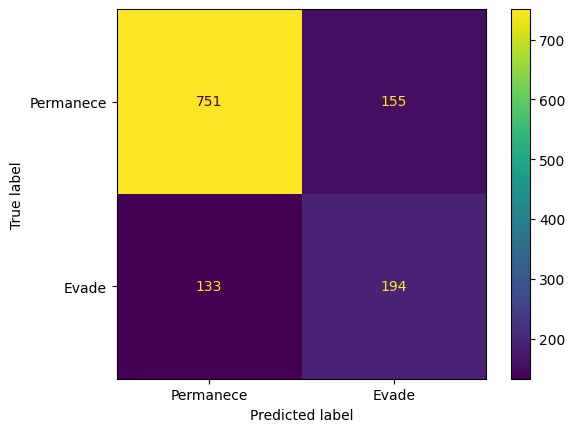

In [308]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizacion = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion,
    display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
)

visualizacion.plot();

In [309]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [310]:
# Calculos iniciales

# Calcula la PRECISIÓN (precision)
# Fórmula: TP / (TP + FP)
# ¿De todos los casos que predije como morosos, cuántos realmente lo eran?
print(f'La precisión del modelo de árbol es: {precision_score(y_val, y_previsto)}')

# Calcula la SENSIBILIDAD o RECALL
# Fórmula: TP / (TP + FN)
# ¿De todos los verdaderos morosos, cuántos logré identificar correctamente?
print(f'La sensibilidad (recall) del modelo de árbol es: {recall_score(y_val, y_previsto)}')

# Calcula la EXACTITUD (accuracy)
# Fórmula: (TP + TN) / (TP + TN + FP + FN)
# ¿Qué proporción total de predicciones fueron correctas?
print(f'La exactitud (accuracy) del modelo de árbol es: {accuracy_score(y_val, y_previsto)}')

# Calcula el F1-SCORE
# Fórmula: 2 * (precision * recall) / (precision + recall)
# Es el promedio armónico entre precisión y recall. Penaliza fuertemente los valores bajos.
print(f'El F1-Score del modelo de árbol es: {f1_score(y_val, y_previsto)}')

La precisión del modelo de árbol es: 0.5558739255014327
La sensibilidad (recall) del modelo de árbol es: 0.5932721712538226
La exactitud (accuracy) del modelo de árbol es: 0.7664233576642335
El F1-Score del modelo de árbol es: 0.5739644970414202
